In [1]:
%cd /content
!git clone -b dev https://github.com/camenduru/diffusers-image-outpaint-hf
%cd /content/diffusers-image-outpaint-hf
!pip install transformers accelerate diffusers

!apt -y install -qq aria2
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/model_index.json -d /content/model/lightning -o model_index.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/scheduler/scheduler_config.json -d /content/model/lightning/scheduler -o scheduler_config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/text_encoder/config.json -d /content/model/lightning/text_encoder -o config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/resolve/main/lightning/text_encoder/model.fp16.safetensors -d /content/model/lightning/text_encoder -o model.fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/text_encoder_2/config.json -d /content/model/lightning/text_encoder_2 -o config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/resolve/main/lightning/text_encoder_2/model.fp16.safetensors -d /content/model/lightning/text_encoder_2 -o model.fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer/merges.txt -d /content/model/lightning/tokenizer -o merges.txt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer/special_tokens_map.json -d /content/model/lightning/tokenizer -o special_tokens_map.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer/tokenizer_config.json -d /content/model/lightning/tokenizer -o tokenizer_config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer/vocab.json -d /content/model/lightning/tokenizer -o vocab.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer_2/merges.txt -d /content/model/lightning/tokenizer_2 -o merges.txt
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer_2/special_tokens_map.json -d /content/model/lightning/tokenizer_2 -o special_tokens_map.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer_2/tokenizer_config.json -d /content/model/lightning/tokenizer_2 -o tokenizer_config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/tokenizer_2/vocab.json -d /content/model/lightning/tokenizer_2 -o vocab.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/unet/config.json -d /content/model/lightning/unet -o config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/resolve/main/lightning/unet/diffusion_pytorch_model.fp16.safetensors -d /content/model/lightning/unet -o diffusion_pytorch_model.fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/unet/diffusion_pytorch_model.safetensors.index.json -d /content/model/lightning/unet -o diffusion_pytorch_model.safetensors.index.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/lightning/vae/config.json -d /content/model/lightning/vae -o config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/resolve/main/lightning/vae/diffusion_pytorch_model.fp16.safetensors -d /content/model/lightning/vae -o diffusion_pytorch_model.fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/vae-fix/config.json -d /content/model/vae-fix -o config.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/resolve/main/vae-fix/diffusion_pytorch_model.safetensors -d /content/model/vae-fix -o diffusion_pytorch_model.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/raw/main/union/config_promax.json -d /content/model/union -o config_promax.json
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/camenduru/outpaint/resolve/main/union/diffusion_pytorch_model_promax.safetensors -d /content/model/union -o diffusion_pytorch_model_promax.safetensors

import torch
from diffusers import AutoencoderKL
from diffusers.models.model_loading_utils import load_state_dict
from controlnet_union import ControlNetModel_Union
from pipeline_fill_sd_xl import StableDiffusionXLFillPipeline
from PIL import Image, ImageDraw

config = ControlNetModel_Union.load_config("/content/model/union/config_promax.json")
controlnet_model = ControlNetModel_Union.from_config(config)
state_dict = load_state_dict("/content/model/union/diffusion_pytorch_model_promax.safetensors")
model, _, _, _, _ = ControlNetModel_Union._load_pretrained_model(controlnet_model, state_dict, "/content/model/union/diffusion_pytorch_model_promax.safetensors", "/content/model/union")
model.to(device="cuda", dtype=torch.float16)
vae = AutoencoderKL.from_pretrained("/content/model/vae-fix", torch_dtype=torch.float16).to("cuda")
pipe = StableDiffusionXLFillPipeline.from_pretrained("/content/model/lightning", torch_dtype=torch.float16, vae=vae, controlnet=model, variant="fp16").to("cuda")

def infer(image, width, height, overlap_width, num_inference_steps, prompt_input=None):
    source = image
    target_size = (width, height)
    overlap = overlap_width

    if source.width < target_size[0] and source.height < target_size[1]:
        scale_factor = min(target_size[0] / source.width, target_size[1] / source.height)
        new_width = int(source.width * scale_factor)
        new_height = int(source.height * scale_factor)
        source = source.resize((new_width, new_height), Image.LANCZOS)

    if source.width > target_size[0] or source.height > target_size[1]:
        scale_factor = min(target_size[0] / source.width, target_size[1] / source.height)
        new_width = int(source.width * scale_factor)
        new_height = int(source.height * scale_factor)
        source = source.resize((new_width, new_height), Image.LANCZOS)

    margin_x = (target_size[0] - source.width) // 2
    margin_y = (target_size[1] - source.height) // 2

    background = Image.new('RGB', target_size, (255, 255, 255))
    background.paste(source, (margin_x, margin_y))

    mask = Image.new('L', target_size, 255)
    mask_draw = ImageDraw.Draw(mask)
    mask_draw.rectangle([
        (margin_x + overlap, margin_y + overlap),
        (margin_x + source.width - overlap, margin_y + source.height - overlap)
    ], fill=0)

    cnet_image = background.copy()
    cnet_image.paste(0, (0, 0), mask)

    final_prompt = "high quality"
    if prompt_input and prompt_input.strip():
        final_prompt += ", " + prompt_input

    (
        prompt_embeds,
        negative_prompt_embeds,
        pooled_prompt_embeds,
        negative_pooled_prompt_embeds,
    ) = pipe.encode_prompt(final_prompt, "cuda", True)

    results = []

    for image in pipe(
        prompt_embeds=prompt_embeds,
        negative_prompt_embeds=negative_prompt_embeds,
        pooled_prompt_embeds=pooled_prompt_embeds,
        negative_pooled_prompt_embeds=negative_pooled_prompt_embeds,
        image=cnet_image,
        num_inference_steps=num_inference_steps
    ):
        results.append((cnet_image, image))

    image = image.convert("RGBA")
    cnet_image.paste(image, (0, 0), mask)

    results.append((background, cnet_image))

    return results

/content
Cloning into 'diffusers-image-outpaint-hf'...
remote: Enumerating objects: 140, done.
remote: Counting objects: 100% (140/140), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 140 (delta 76), reused 128 (delta 67), pack-reused 0 (from 0)
Receiving objects: 100% (140/140), 538.09 KiB | 2.08 MiB/s, done.
Resolving deltas: 100% (76/76), done.
/content/diffusers-image-outpaint-hf
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

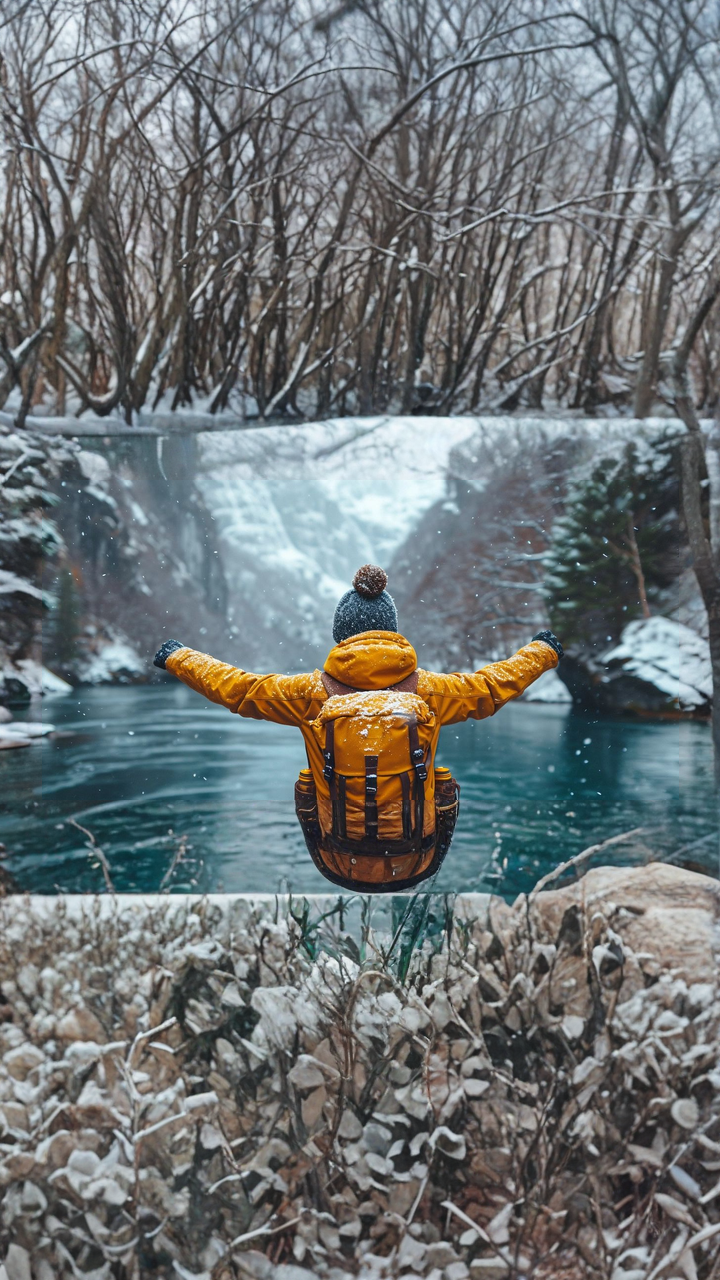

In [2]:
input_image = Image.open("/content/diffusers-image-outpaint-hf/examples/example_3.jpg")
width = 1280
height = 720
overlap_width = 42
num_inference_steps = 8
prompt_input = None
output_image = infer(input_image, height, width, overlap_width, num_inference_steps, None)
output_image[num_inference_steps+1][1]